In [139]:
import networkx as nx
import matplotlib.pyplot as plt
from random import choice
import numpy as np

In [140]:
class AS:
    
    def __init__(self, G, m=10, NC=1, beta=5, alpha=1, Q=100, p=0.5):
        # Graph to run Ant System on.
        self.G = G
        # Number of total nodes.
        self.N = len(G.nodes)
        # Number of ants to work with.
        self.m = m
        # Number of cycles to perform. 
        self.NC = NC
        # Parameter specifying importance of pheromone intensity.
        self.alpha = alpha
        # Parameter specifying importance of distance.
        self.beta = beta
        # Parameter specifying pheremone update.
        self.Q = Q
        # Parameter specifying evaporation rate.
        self.p = p
        # Set up the initial tabu list.
        self.tabu = self._initalize_tabu()
        # Set up history of the best path lengths.
        self.path_history = []
        # Indicator if print statements should be ran
        self.print_stuff=False
        
    def c_print(self, *args, **kwargs):
        if self.print_stuff:
            print(*args, **kwargs)
        
    def simulate(self):
        for c in range(self.NC):
            self.c_print("Starting cyle: {}".format(c))
            self._cycle()
            ant_path_lengths = [self.path_length(m_ix) 
                                for m_ix in 
                                range(self.m)]
            self._update_pheromone(ant_path_lengths)
            min_ant = np.argmin(ant_path_lengths)
            min_path_length = ant_path_lengths[min_ant]
            # Store best path, and length
            print("Best path: {}".format(min_path_length))
            self.path_history.append((min_path_length, self.tabu[min_ant].copy()))
            
            # Replace new ants start at ending location.
            self.tabu[:, 0] = ant.tabu[:, -1]
            # Replace the rest of the values.
            ant.tabu[:,1:] = None 
    
    def _initalize_tabu(self):
        # Set up the tabu list.
        tabu = np.ndarray((self.m, self.N), dtype=object)
        for i in range(self.m):
            tabu[i][0] = choice(list(self.G.nodes))
        return tabu
    
    def path_contains_edge(self, m, edge):
        path = self.tabu[m]
        diff = np.abs(np.argwhere(path == edge[0]) - np.argwhere(path == edge[1]))
        return all(diff == 1)
    
    def _update_pheromone(self, path_lengths):
        for edge in self.G.edges():
            self.c_print("******* Edge: {} *********".format(edge))
            # Accumulate the total pheremone deposted by ants.
            pheromone_delta = 0
            for m_ix in range(self.m):
                # Check if ant passed edge.
                # Since this is updirected graph we have to check ants go back and forth.
                self.c_print(self.path_contains_edge(m_ix, edge))
                if self.path_contains_edge(m_ix, edge):
                    self.c_print("Ant passed this edge, dropped: {}".format(self.Q/path_lengths[m_ix]))
                    pheromone_delta += self.Q/path_lengths[m_ix]   
            # Update edge p*t_ij(t) + /\t_ij
            self.c_print("updated with : {}, old: {}".format(self.p*self.G.edges[edge]['pheromone'] + pheromone_delta, 
                                                      self.G.edges[edge]['pheromone']))
            self.G.edges[edge]['pheromone'] = self.p*self.G.edges[edge]['pheromone'] + pheromone_delta
    
    def path_length(self, ant):
        path = self.tabu[ant]
        # Sum up total distance path requires.
        path_distance = np.sum([self.G.edges[path[i], path[i+1]]['distance'] for i in range(len(path)-1)])
        path_distance += self.G.edges[path[0], path[-1]]['distance']
        return path_distance
    
    def transition_probability(self, ant, t):
        # Collect towns that are still valid, and calcualte their probability.
        towns, town_probs = [], []
        
        # Iterate over all neighbors that the ant is currently at.
        for node, info in self.G[self.tabu[ant][t-1]].items():
            # Check to make sure the ant hasnt already visited the town.
            if node not in self.tabu[ant][:t]:
                towns.append(node)
                town_probs.append((info['pheromone']**self.alpha)*((1/info['distance'])**self.beta))
        
        # Normalize probability results to be within [0,1]
        town_probs = np.array(town_probs)
        town_probs = town_probs/town_probs.sum()
        return towns, town_probs
    
    def _cycle(self):
        for t_ix in range(1, self.N):
            self.c_print("Cycle Iteration{}".format(t_ix))
            for a_ix in range(self.m):
                avail_towns, probs = self.transition_probability(a_ix, t_ix)
                next_town = np.random.choice(avail_towns, p=probs)
                self.tabu[a_ix][t_ix] = next_town
                self.c_print("Moving ant: {}, at time: {}, to town: {}".format(a_ix, t_ix, next_town))
        
    def plot_cycle(self, attribute='pheromone', positions=None):
        if not positions:
            pos = nx.spring_layout(self.G)
        else:
            pos = positions
        # nodes
        nx.draw_networkx_nodes(self.G, pos, node_size=700)
        # edges
        for e in self.G.edges(data=True):
            nx.draw_networkx_edges(self.G, pos, edgelist=[(e[0], e[1])], width=e[2][attribute], alpha=.5)
        # labels
        nx.draw_networkx_labels(self.G, pos, font_size=20, font_family='sans-serif')
        plt.axis('off')

In [95]:
sols = np.array([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 24, 26, 27, 28, 29, 30,  2])

In [141]:
oliver30_positions = np.array([54, 67, 
                               54, 62,
                               37, 84,
                               41, 94,
                               2, 99,
                               7, 64,
                               25, 62,
                               22, 60,
                               18, 54,
                               4, 50,
                               13, 40,
                               18, 40,
                                24, 42,
                                25, 38,
                                44, 35,
                                41, 26,
                                45, 21,
                                58, 35,
                                62, 32,
                                82,  7,
                                91, 38,
                                83, 46,
                                71, 44,
                                64, 60,
                                68, 58,
                                83, 69,
                                87, 76,
                                74, 78,
                                71, 71,
                                58, 69]).reshape(30, 2)

In [ ]:
G = nx.Graph()
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')

G.add_edge('A', 'B', distance=20, pheromone=1)
G.add_edge('A', 'C', distance=10, pheromone=1)
G.add_edge('A', 'D', distance=15, pheromone=1)

G.add_edge('C', 'B', distance=25, pheromone=1)
G.add_edge('C', 'D', distance=35, pheromone=1)

G.add_edge('D', 'B', distance=30, pheromone=1)

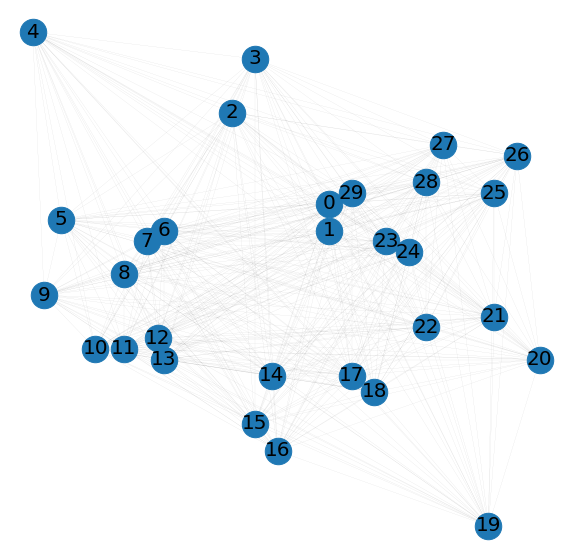

In [148]:
plt.figure(figsize=(10,10))
G = nx.complete_graph(30)
oliver_pos = oliver30_positions
pos_dict = {}
for node, pos in zip(G.nodes(), oliver_pos):
    pos_dict[node] = pos
    G.nodes[node]['position'] = pos
    
for e in G.edges():
    distance = np.linalg.norm(G.nodes[e[0]]['position']-G.nodes[e[1]]['position'])
    G.edges[(e[0], e[1])]['distance'] = distance
    G.edges[(e[0], e[1])]['pheromone'] = 1e-3

# nodes
nx.draw_networkx_nodes(G, pos_dict, node_size=700)

# # edges
for e in G.edges(data=True):
    nx.draw_networkx_edges(G, pos_dict, edgelist=[(e[0], e[1])], width=.1, alpha=.3)
# nx.draw_networkx_edges(G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color='b', style='dashed')

# # labels
nx.draw_networkx_labels(G, pos_dict, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [98]:
ant.path_history[-1]

(461.526194471297,
 array([4, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 21, 20, 19, 25,
        26, 27, 28, 24, 23, 1, 0, 29, 3, 2, 6, 7, 8], dtype=object))

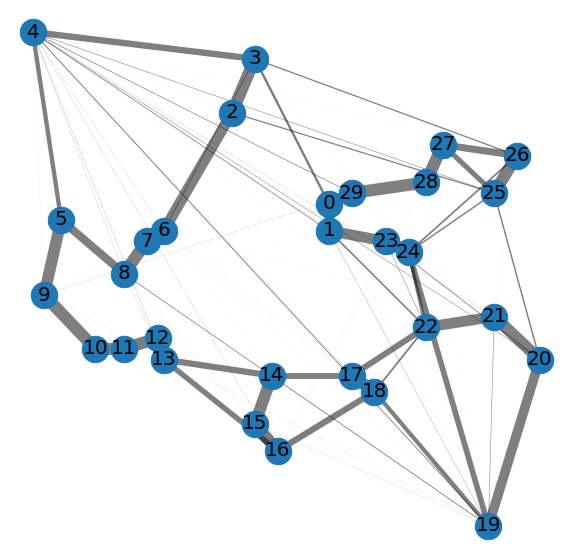

In [145]:
plt.figure(figsize=(10,10))
ant.plot_cycle(attribute='pheromone', positions=pos_dict)
plt.savefig("Example")

In [144]:
best_path = np.argmin(list(map(lambda x: x[0], ant.path_history)))
ant.path_history[best_path]

(426.54384791848247,
 array([1, 0, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 14, 15,
        16, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2], dtype=object))

In [143]:
ant = AS(G, m=30, NC=300)
ant.simulate()

Best path: 477.16801338576005
Best path: 449.4213196800832
Best path: 447.21596730533605
Best path: 436.3682981722016
Best path: 426.54384791848247
Best path: 446.8700665201179
Best path: 457.87762292716104
Best path: 448.77851878071715
Best path: 452.93046803520224
Best path: 443.20678605277453
Best path: 472.4171458612134
Best path: 443.74542721928873
Best path: 437.2054929249932
Best path: 431.4362829085657
Best path: 450.60965505166905
Best path: 449.06703766547975
Best path: 451.9854072524742
Best path: 434.2214416531181
Best path: 448.42817087099496
Best path: 464.12864862473697
Best path: 457.5213997150995
Best path: 441.50002519197994
Best path: 454.494550844198
Best path: 443.9082407912917
Best path: 459.7860751877603
Best path: 459.7740045728838
Best path: 444.2265553614716
Best path: 456.86164153373545
Best path: 448.42817087099496
Best path: 459.7860751877603
Best path: 456.5221454519532
Best path: 449.7667238458871
Best path: 448.77851878071715
Best path: 451.7215957035027

# Smaller Example

In [134]:
ant = AS(G=G, m=3, NC=20)
ant.simulate()

Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20
Best path: 20


In [135]:
ant.path_history[-1]

(20, array(['B', 'D', 'C', 'A'], dtype=object))

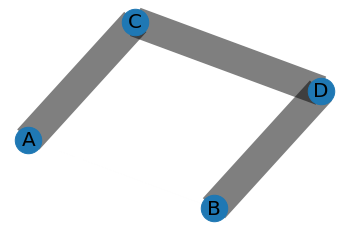

In [136]:
ant.plot_cycle(positions=pos)
plt.savefig('result.png')

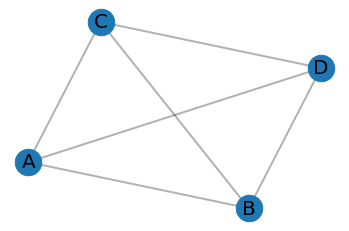

In [138]:
G = nx.Graph()
G.add_edge('A', 'B', distance=10, pheromone=0.02)
G.add_edge('B', 'D', distance=2, pheromone=0.02)
G.add_edge('A', 'C', distance=6, pheromone=0.02)
G.add_edge('C', 'D', distance=2, pheromone=0.02)
G.add_edge('C', 'B', distance=6, pheromone=0.02)
G.add_edge('D', 'A', distance=7, pheromone=0.02)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['distance'] > 0]
# esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['distance'] <= 5]

pos = nx.spring_layout(G)
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,width=2, alpha=.3)
# nx.draw_networkx_edges(G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
# nx.draw_networkx_edge_labels(G, pos)

plt.axis('off')
plt.savefig('Base')